In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Analysing SalePrice

In [ ]:
print(f'The train data size before dropping Id feature is : {train_data.shape}')
print(f'The test data size before dropping Id feature is : {test_data.shape}')

train_ID = train_data['Id']
test_ID = test_data['Id']

train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

print(f'The train data size after dropping Id feature is : {train_data.shape}') 
print(f'The test data size after dropping Id feature is : {test_data.shape}')

## Data processing

In [6]:
import seaborn as sns

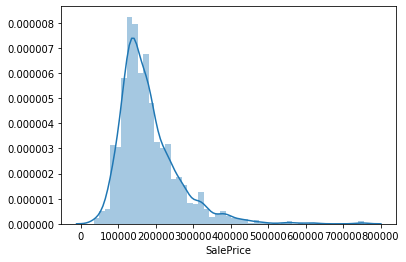

In [7]:
sns.distplot(train_data['SalePrice'])

In [8]:
print('Skewness: %f' % train_data['SalePrice'].skew())
print('Kurtosis: %f' % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Relationship with numerical variables

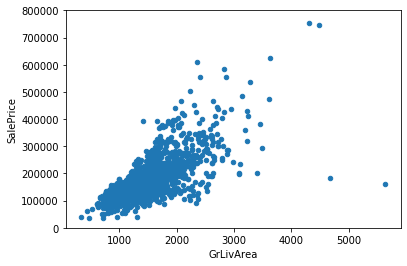

In [9]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

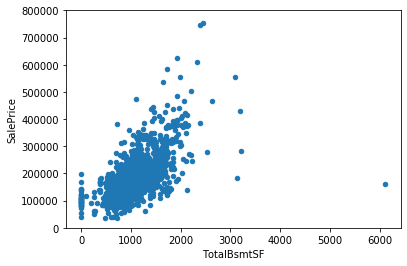

In [10]:
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [11]:
import matplotlib.pyplot as plt

(-0.5, 9.5, 0, 800000)

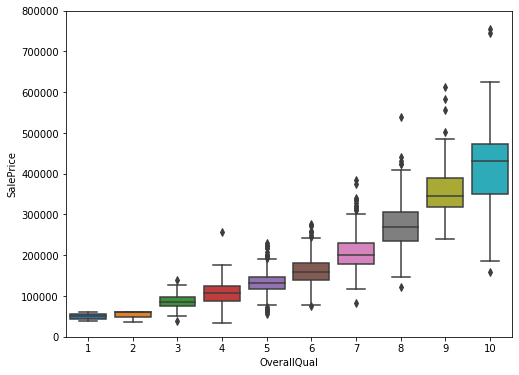

In [12]:
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

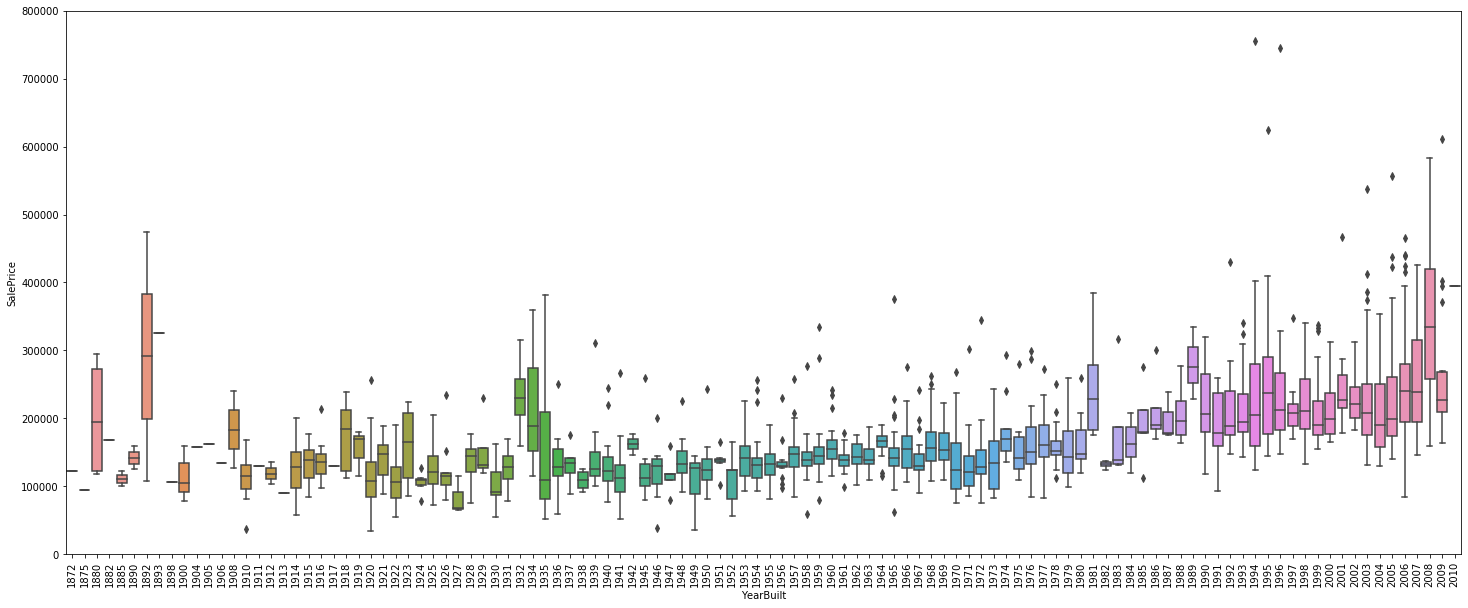

In [13]:
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### Data correlation

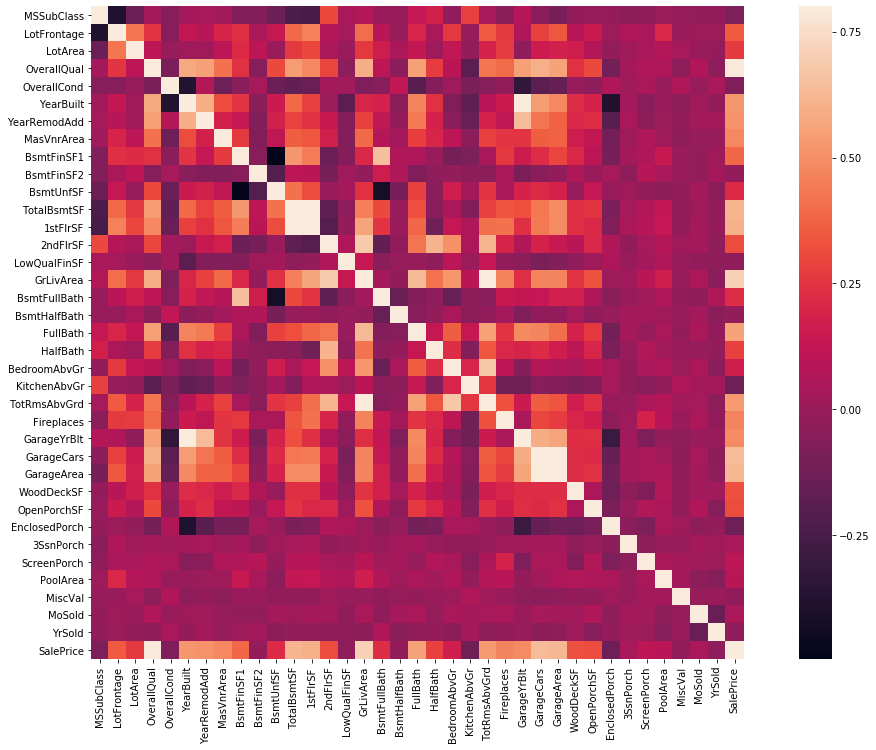

In [14]:
corrmatrix = train_data.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmatrix, vmax=.8, square=True)

In [15]:
import numpy as np

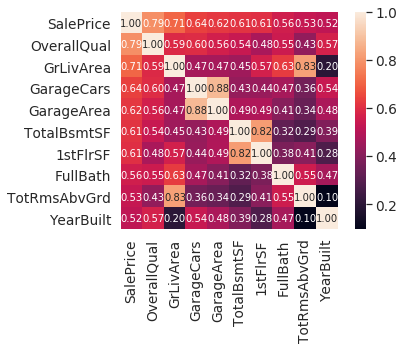

In [16]:
k = 10
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

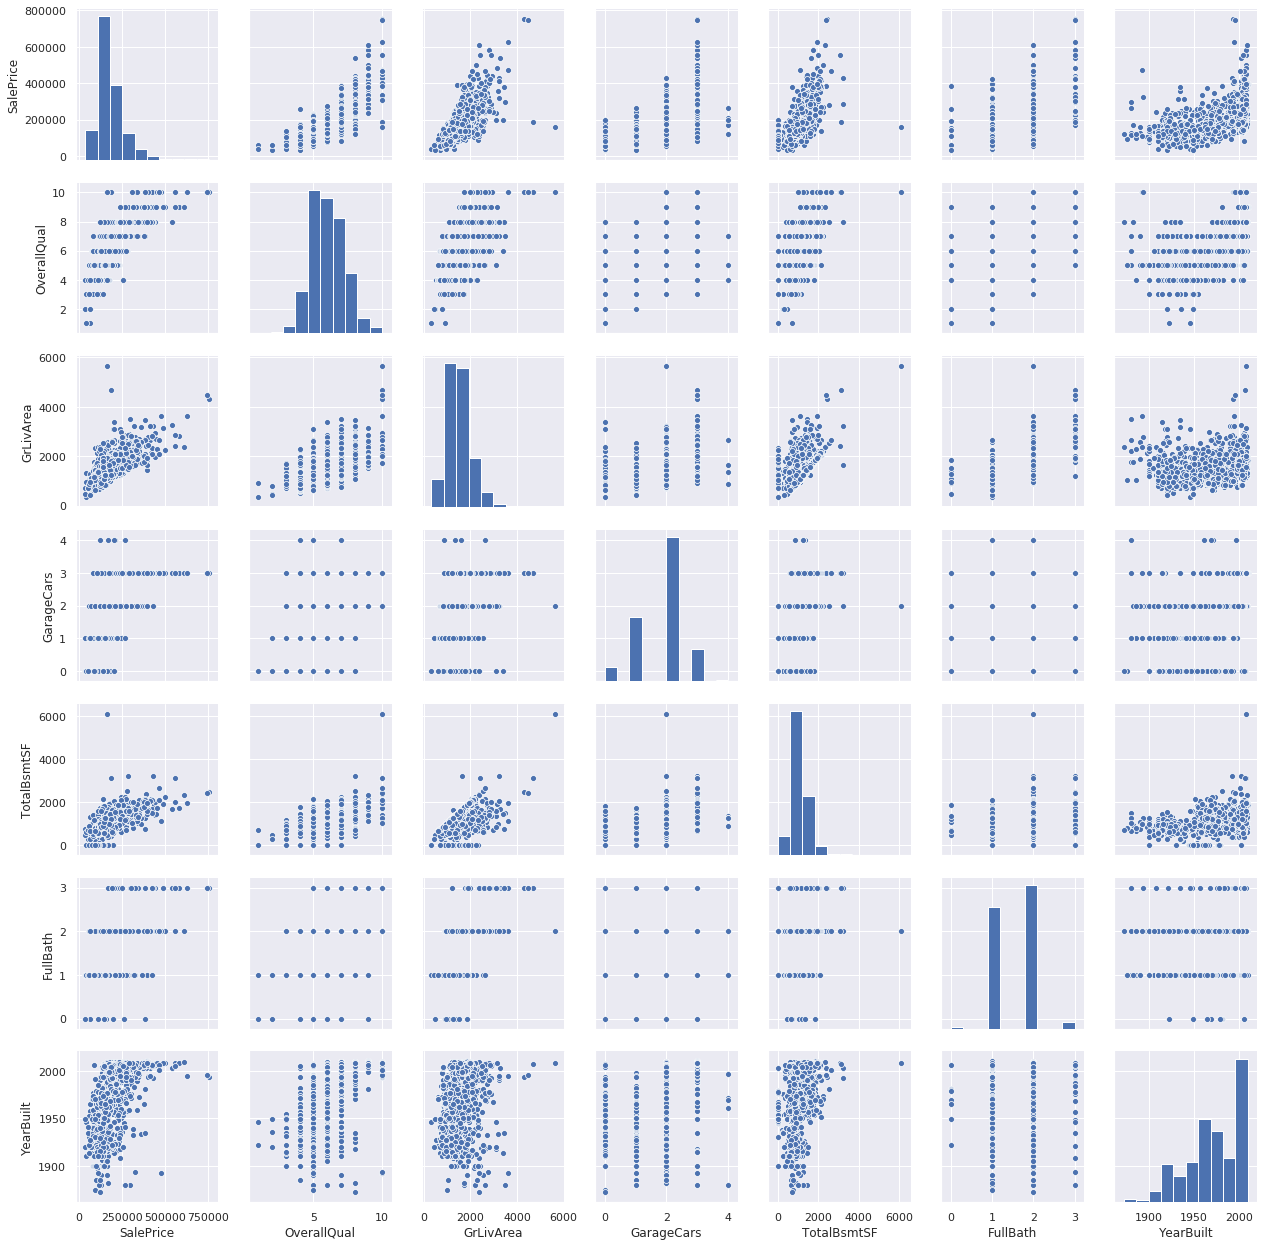

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], height = 2.5)
plt.show()

#### Feature engineering

In [18]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


#### Imputing missing values

In [19]:
train_data['PoolQC'].fillna('None', inplace=True)

In [20]:
train_data['MiscFeature'].fillna('None', inplace=True)

In [21]:
train_data['Alley'].fillna('None', inplace=True)

In [22]:
train_data['Fence'].fillna('None', inplace=True)

In [23]:
train_data['FireplaceQu'].fillna('None', inplace=True)

In [24]:
train_data['LotFrontage'] = train_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [25]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_data[col] = train_data[col].fillna('None')

In [26]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_data[col] = train_data[col].fillna(0)

In [27]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_data[col] = train_data[col].fillna('None')

In [28]:
train_data["MasVnrType"].fillna("None", inplace=True)
train_data["MasVnrArea"].fillna(0, inplace=True)

In [29]:
train_data = train_data.drop(['Utilities'], axis=1)

In [30]:
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0], inplace=True)

In [31]:
train_data.isnull().sum().max()

0

In [32]:
train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)

In [33]:
train_data['OverallCond'] = train_data['OverallCond'].astype(str)

In [34]:
train_data['YrSold'] = train_data['YrSold'].astype(str)
train_data['MoSold'] = train_data['MoSold'].astype(str)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train_data[c].values))
    train_data[c] = lbl.transform(list(train_data[c].values))
    
print(f'Shape of the data: {train_data.shape}')

Shape of the data: (1460, 79)


In [37]:
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']

#### Skewed features

In [38]:
from scipy.stats import skew

In [39]:
numeric_features = train_data.dtypes[train_data.dtypes != 'object'].index

skewed_features = train_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(20)

,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
LandSlope,4.808735
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186


#### Box Cox Transformation of (highly) skewed features

In [41]:
skewness = skewness[abs(skewness) > 0.75]
print(f'There are {skewness.shape[0]} skewed numerical features to Box Cox transformation')

There are 60 skewed numerical features to Box Cox transformation


In [42]:
from scipy.special import boxcox1p

In [43]:
skewed_features = skewness.index
lambda_ = 0.15
for feat in skewed_features:
    train_data[feat] = boxcox1p(train_data[feat], lambda_)

#### Getting dummy categorical features

In [45]:
train_data = pd.get_dummies(train_data)

## Modelling

#### Import libraries

In [61]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#### Define a cross validation strategy

In [72]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data.values)
    rmse = np.sqrt(-cross_val_score(model, train_data.values, train_data['SalePrice'].values,
                                   scoring='neg_mean_squared_error', cv=kf))
    return(rmse)

#### Base models

In [73]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [74]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [75]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [76]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [77]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [89]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Base models' scores

In [84]:
score = rmsle_cv(lasso)
print(f'Lasso score: {score.mean()} ({score.std()})')

Lasso score: 0.0006546535959218453 (3.369642846031881e-05)


In [85]:
score = rmsle_cv(ENet)
print(f'ElasticNet score: {score.mean()} ({score.std()})')

ElasticNet score: 0.000797259922013765 (4.061903102260026e-05)


In [86]:
score = rmsle_cv(KRR)
print(f'KernelRidge score: {score.mean()} ({score.std()})')

KernelRidge score: 0.04305736945504279 (0.0032764585761311652)


In [87]:
score = rmsle_cv(GBoost)
print(f'GradientBoostingRegressor score: {score.mean()} ({score.std()})')

GradientBoostingRegressor score: 0.4601876692095191 (0.059013949979948105)


In [88]:
score = rmsle_cv(model_xgb)
print(f'XGBRegressor score: {score.mean()} ({score.std()})')

XGBRegressor score: 0.1975984482764817 (0.011042957554600833)


In [90]:
score = rmsle_cv(model_lgb)
print(f'LGBMRegressor score: {score.mean()} ({score.std()})')

LGBMRegressor score: 0.4360126664221763 (0.03641444298501853)


#### Averaged base models' class

In [92]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)
            
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        
        return np.mean(predictions, axis=1)

#### Averaged base models' score

In [93]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))
score = rmsle_cv(averaged_models)
print(f'Averaged base models score: {score.mean()} ({score.std()})')

Averaged base models score: 0.11627585723378717 (0.013489947374457259)


#### Stacking averaged Models' Class

In [94]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions. Needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    def predict(self, X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1) 
                                         for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features) 

#### Stacking Averaged models' Score

In [95]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR), meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)
print(f'Stacking Averaged models score: {score.mean()} ({score.std()})')

Stacking Averaged models score: 0.0006708246490322171 (3.252166822854024e-05)


#### Ensembling StackedRegressor, XGBoost and LightGBM

In [96]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#### Final Training and Prediction

#### StackedRegressor

In [ ]:
stacked_averaged_models.fit(train_data.values, train_data['SalePrice'].values)
stacked_train_pred = stacked_averaged_models.predict(train_data.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_data.values))
print(rmsle(train_data['SalePrice'].values, stacked_train_pred))

#### XGBoost

In [ ]:
model_xgb.fit(train_data.values, train_data['SalePrice'].values)
xgb_train_pred = model_xgb.predict(train_data.values)
xgb_pred = np.expm1(model_xgb.predict(test_data.values))
print(rmsle(train_data['SalePrice'].values, xgb_train_pred))

#### LightGBM

In [ ]:
model_lgb.fit(train_data.values, train_data['SalePrice'].values)
lgb_train_pred = model_lgb.predict(train_data.values)
lgb_pred = np.expm1(model_lgb.predict(test_data.values))
print(rmsle(train_data['SalePrice'].values, lgb_train_pred))

#### Ensemble prediction

In [ ]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 + xgb_train_pred*0.15 + lgb_train_pred*0.15 ))